<a href="https://colab.research.google.com/github/BrouthenKamel/HAICK-2023/blob/main/HAICK_2023_Sonatrach_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from tensorflow import keras as keras
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

data_path = '/gdrive/MyDrive/Sonatrach_Dataset'

data_sample = pd.read_csv(data_path+'/sample.csv')
data_train = pd.read_csv(data_path+'/train_dataset.csv')
data_test = pd.read_csv(data_path+'/test_dataset.csv')

target_col = "ROP (Time)"

<AxesSubplot:>

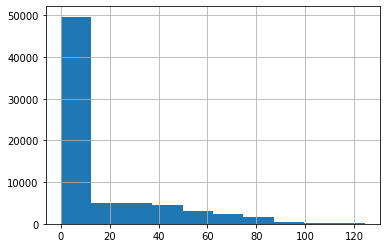

In [ ]:
data_train[target_col].hist()

In [ ]:
X = data_train.drop(columns = [target_col])
y = data_train[target_col]

In [ ]:
data_train[data_train[target_col] == 0][target_col].shape

(42351,)

<AxesSubplot:>

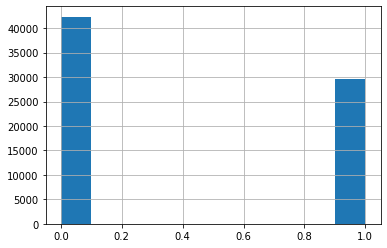

In [ ]:
data_train["is_penetratable"] = data_train['ROP (Time)'] != 0
data_train["is_penetratable"] = data_train["is_penetratable"].replace({True:1, False:0})
data_train["is_penetratable"].hist()

In [ ]:
X = data_train.drop(columns = ["is_penetratable", 'ROP (Time)'])
y_classif = data_train["is_penetratable"]
y_regress = data_train["ROP (Time)"]

In [ ]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [ ]:
mi_scores = make_mi_scores(X, y_classif)

In [ ]:
mi_scores

In [ ]:
mi_scores[mi_scores > 0.2].index

Index(['Depth: TMD', 'WOB Max', 'WOB Avg', 'RPM Avg', 'Torque Avg', 'RPM Inst',
       'Torque Max', 'Torque Min', 'WOH Avg', 'WOH Max', 'WOH Inst',
       'Flow In Pumps'],
      dtype='object')

In [ ]:
features_classif = ['Depth: TMD', 'WOB Max', 'WOB Avg', 'RPM Avg', 'Torque Avg', 'RPM Inst',
       'Torque Max', 'Torque Min', 'WOH Avg', 'WOH Max', 'WOH Inst',
       'Flow In Pumps']
X_classif = X[features_classif]

In [ ]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std, columns=X.columns)

In [ ]:
pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(X_std)
X_pca = pd.DataFrame(X_pca)

In [ ]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classif, y_classif, test_size = 0.3, random_state=42, stratify = y_classif)

In [ ]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_pca, y_classif, test_size = 0.3, random_state=42, stratify = y_classif)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [ ]:
print(X_test_class.shape, y_test_class.shape)

(21600, 8) (21600,)


In [ ]:
from xgboost import XGBClassifier

xgb_cls = XGBClassifier(gamma=0.1, max_depth=15, n_estimators=300)

xgb_cls.fit(X_train_class, y_train_class)

y_pred = xgb_cls.predict(X_test_class)

print(y_pred.shape)

accuracy = accuracy_score(y_test_class, y_pred)
recall = recall_score(y_test_class, y_pred)
precision = precision_score(y_test_class, y_pred)

print(f"accuracy = {accuracy} , recall = {recall} , precision = {precision}")

(21600,)
accuracy = 0.9923148148148148 , recall = 0.9916807195053401 , precision = 0.9896779984292606


In [ ]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [ ]:
mi_scores = make_mi_scores(X, y_regress)

In [ ]:
mi_scores[mi_scores > 0.5].index

Index(['Depth: TMD', 'Bit Position', 'Gas Main: C1', 'Flow In Pumps',
       'RPM Avg', 'Pressure: SPP Avg', 'Mud:Temperature IN Avg',
       'Pit 2 Volume', 'RPM Inst', 'WOB Avg', 'WOB Max', 'Hook Position',
       'Pit 5 Volume', 'Gas Main: C2', 'Pit 6 Volume', 'WOH Avg',
       'Gas Main: nC4', 'WOH Max', 'Pit 3 Volume', 'Torque Max',
       'Pit 4 Volume', 'Torque Avg', 'WOH Inst', 'Torque Min',
       'Mud: Temperature OUT Avg', 'Gas Main: C3', 'Gas Main: iC5',
       'Gas Main: nC5', 'Flow Paddle'],
      dtype='object')

In [ ]:
feature_regress = ['Depth: TMD', 'Bit Position', 'Gas Main: C1', 'Flow In Pumps',
       'RPM Avg', 'Pressure: SPP Avg', 'Mud:Temperature IN Avg',
       'Pit 2 Volume', 'RPM Inst', 'WOB Avg', 'WOB Max', 'Hook Position',
       'Pit 5 Volume', 'Gas Main: C2', 'Pit 6 Volume', 'WOH Avg',
       'Gas Main: nC4', 'WOH Max', 'Pit 3 Volume', 'Torque Max',
       'Pit 4 Volume', 'Torque Avg', 'WOH Inst', 'Torque Min',
       'Mud: Temperature OUT Avg', 'Gas Main: C3', 'Gas Main: iC5',
       'Gas Main: nC5', 'Flow Paddle']

In [ ]:
X_regress = data_train[feature_regress]

In [ ]:
X_train_regress, X_test_regress, y_train_regress, y_test_regress = train_test_split(X_pca, y_regress, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [ ]:
def train_func(n_estimators):
  errors = dict()
  xgb_reg = XGBRegressor(learning_rate = 0.1, max_depth = 20, n_estimators = n_estimators, n_jobs = -1, objective = 'reg:squarederror')

  xgb_reg.fit(X_train_regress, y_train_regress)

  y_pred = xgb_reg.predict(X_test_regress)
  rmse = np.sqrt(mean_squared_error(y_test_regress, y_pred))
  print(f"RMSE: {rmse} with {n_estimators}")
  errors[str(n_estimators)] = rmse

In [ ]:
for est in [900, 700]:
  results = train_func(est)

RMSE: 5.533872825373872 with 300
RMSE: 5.533829215818984 with 500
RMSE: 5.5338292158194875 with 700


In [ ]:
print(results)

In [ ]:
submission = dict()
submission["id"] = []
submission["ROP (Time)"] = []

data_classif_pred = xgb_cls.predict( data_test )
data_regress_pred = xgb_reg.predict( data_test )

print(data_classif_pred.shape)


(14394,)


In [ ]:
for i in range(data_classif_pred.shape[0]):
  submission["id"].append(i)
  if( data_classif_pred[i] == 0 ):
    submission["ROP (Time)"].append(0)
  else:
    submission["ROP (Time)"].append(data_regress_pred[i])

<AxesSubplot:>

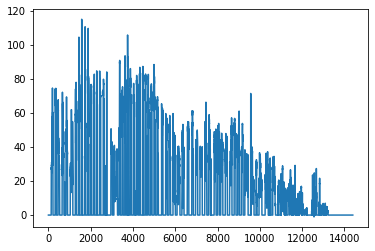

In [ ]:
submit = pd.DataFrame(submission)
submit["ROP (Time)"].plot()

In [ ]:
submit.to_csv('/content/submission.csv', index=False)